# Minimum Viable Product (MVP)

### In this file, i'm showing all steps i have been applied for my project as MVP

### 1. Preparing the environment

        
. Install Python on my machine.<br>. Install Anaconda.<br>. Install Jupyter Notebook.<br>. Install libraries (Numpy, Tensorflow, Pickle... etc..).

### 2. Import libraries

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix , classification_report

### 3. Download/Load dataset

#### <font color=green>CIFAR 10 is an images dataset, consists of <font color=blue>*60,000*</font> 32x32 color images in 10 classes, with 6000 images per class.</font>  __[Go to CIFAR site](https://www.cs.toronto.edu/~kriz/cifar.html)__

In [2]:
# Download dataset and get all train and test data
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
# Show data shapes

print(f"X train shape: {X_train.shape}")
print(f"y train shape: {y_train.shape}")
print("------------------------------------")
print(f"X test shape: {X_test.shape}")
print(f"y test shape: {y_test.shape}")

X train shape: (50000, 32, 32, 3)
y train shape: (50000, 1)
------------------------------------
X test shape: (10000, 32, 32, 3)
y test shape: (10000, 1)


<font color=black>__Output notes:__<br>1.There are 50,000 images for training. <br>2.There are 10,000 images for testing. <br>3.The shape of (y_train) and (y_test) are 2D array, we need to convert them to 1D array for our classification. </font>

In [4]:
# Reshape y_train, y_test
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [5]:
# Define classes as provided in CIFAR 10
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

### 4. Visualize/Display image

In [6]:
# Define a function to display image
def plot_image(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])

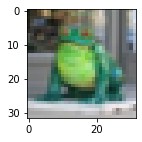

In [7]:
# Show randomly image with index --> 19
plot_image(X_train, y_train, 19)

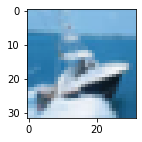

In [8]:
# Another randomly image with index --> 8
plot_image(X_train, y_train, 8)

#### <font color=red>Note: you notice that the images have a low resolution because their dimension is 32*32 (very small)</font>

### 5. Build a convolutional Neural Network (CNN)

I need to normalize the data, as we know image has 3 channels (R, G, B) R = 0 to 255, Green = 0 to 255, Blue = 0 to 255.<br>
So, i want to set it in value between 0 and 1, and i do that by divide each image value by 255

In [9]:
# Before normalizing
X_train[19]
X_test[8]

array([[[ 23,  19,  23],
        [ 19,  21,  28],
        [ 21,  16,  19],
        ...,
        [200, 155, 125],
        [199, 152, 122],
        [197, 151, 120]],

       [[ 23,  20,  24],
        [ 19,  20,  27],
        [ 21,  17,  20],
        ...,
        [205, 168, 133],
        [204, 164, 129],
        [202, 163, 128]],

       [[ 23,  20,  24],
        [ 20,  20,  26],
        [ 23,  20,  23],
        ...,
        [211, 173, 139],
        [208, 169, 136],
        [206, 166, 132]],

       ...,

       [[194, 196, 163],
        [177, 179, 144],
        [176, 179, 141],
        ...,
        [149, 131, 117],
        [148, 130, 116],
        [141, 123, 110]],

       [[172, 177, 142],
        [157, 161, 126],
        [165, 170, 131],
        ...,
        [140, 122, 108],
        [149, 130, 116],
        [152, 134, 119]],

       [[151, 157, 123],
        [134, 140, 104],
        [144, 151, 112],
        ...,
        [149, 132, 118],
        [155, 137, 123],
        [150, 132, 118]]

In [10]:
# Normalizing the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
# Normalizing the training data
X_train[19]
X_test[8]

array([[[0.09019608, 0.0745098 , 0.09019608],
        [0.0745098 , 0.08235294, 0.10980392],
        [0.08235294, 0.0627451 , 0.0745098 ],
        ...,
        [0.78431373, 0.60784314, 0.49019608],
        [0.78039216, 0.59607843, 0.47843137],
        [0.77254902, 0.59215686, 0.47058824]],

       [[0.09019608, 0.07843137, 0.09411765],
        [0.0745098 , 0.07843137, 0.10588235],
        [0.08235294, 0.06666667, 0.07843137],
        ...,
        [0.80392157, 0.65882353, 0.52156863],
        [0.8       , 0.64313725, 0.50588235],
        [0.79215686, 0.63921569, 0.50196078]],

       [[0.09019608, 0.07843137, 0.09411765],
        [0.07843137, 0.07843137, 0.10196078],
        [0.09019608, 0.07843137, 0.09019608],
        ...,
        [0.82745098, 0.67843137, 0.54509804],
        [0.81568627, 0.6627451 , 0.53333333],
        [0.80784314, 0.65098039, 0.51764706]],

       ...,

       [[0.76078431, 0.76862745, 0.63921569],
        [0.69411765, 0.70196078, 0.56470588],
        [0.69019608, 0

In [12]:
# Create CNN Model
CNN = models.Sequential([
    
    # First layer
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    # Second layer
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [13]:
# Compile CNN
CNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 6. Let's train CNN

In [14]:
CNN.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 33s 19ms/step - loss: 1.4504 - accuracy: 0.4795
Epoch 2/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.0813 - accuracy: 0.6214
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9488 - accuracy: 0.6692
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8609 - accuracy: 0.7005
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7962 - accuracy: 0.7243
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7357 - accuracy: 0.7438
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.6869 - accuracy: 0.7622
Epoch 8/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.6382 - accuracy: 0.7776
Epoch 9/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.5975 - accuracy: 0.7913
Epoch 10/10
1563/1563 [==============================] - 32s 20m

In [15]:
evaluation = CNN.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9189 - accuracy: 0.7012


In [16]:
print(f"Accuracy = {round(evaluation[1] * 100)} %")

Accuracy = 70 %


<font color=black>__Output notes:__<br>The accuracy of CNN is about 70 %, and that is good as starter. Maybe later i will try to improve it. </font>

### 7. Time to predict

I am going to predict elements with indexes (2, 3, 5)

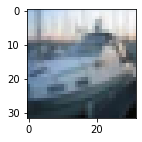

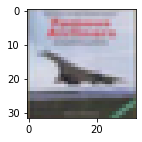

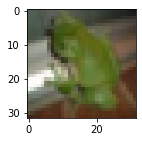

In [17]:
# Let's see the elements before ask prediction from the model
plot_image(X_test, y_test, 2)
plot_image(X_test, y_test, 3)
plot_image(X_test, y_test, 7)

In [18]:
# Start prediction
predict = CNN.predict(X_test)

In [19]:
# Now Let's ask model
predict_1 = np.argmax(predict[2])
predict_2 = np.argmax(predict[3])
predict_3 = np.argmax(predict[7])

print(predict_1)
print(predict_2)
print(predict_3)

8
0
2


In [20]:
# Results
result_1 = classes[predict_1]
result_2 = classes[predict_2]
result_3 = classes[predict_3]

print(result_1)
print(result_2)
print(result_3)

ship
airplane
bird


### <font color=blue>So, the previous experiment with CIFAR 10 and CNN gave me a general vision of how Deep learning works with images by using neural networks.</font>

### 8. Let's Create my own dataset, and build CNN for it 

#### I have collected a small dataset with 60*80 images size, i divide all images to three main folders for (validation/ training/ testing), with 6 classes for each.

![title](img/dataset_folders.png)

![Categories folders](img/category_folders.png)

![Some of prohibited images](img/prohibited_images.png)

In [62]:
# you might need to install opencv-python for cv 2
#! pip install opencv-python

In [63]:
# Import libraries
import os
import cv2
import pickle
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Visualize/Display image

In [64]:
# I select an image from training folder
sample_image = image.load_img("dataset/training/bag/1525.jpg")

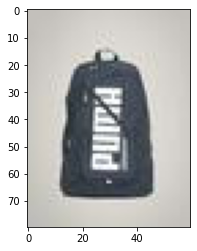

In [65]:
plt.imshow(sample_image);

In [66]:
# Display image shape
cv2.imread("dataset/training/bag/1525.jpg").shape

(80, 60, 3)

In [67]:
# Define variables for (batch size, image height, image width, epochs), because i need to use it repeatedly
batch_size = 1
img_height = 80
img_width = 60

epochs=10

In [68]:
# Define the training dataset using keras and will print all file and classess founded
train_ds = tf.keras.utils.image_dataset_from_directory(
  "dataset/training/",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 496 files belonging to 6 classes.
Using 397 files for training.


In [69]:
# Define the validating dataset using keras and will print all file and classess founded
val_ds = tf.keras.utils.image_dataset_from_directory(
  "dataset/validating/",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 154 files belonging to 6 classes.
Using 30 files for validation.


In [70]:
# Show all classes depend on folders names
class_names = train_ds.class_names
print(class_names)

['bag', 'prohibited', 'slipper', 'sunglass', 'tail', 'watch']


In [71]:
# Some operations to shuffle images data
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE) # keeps the images in memory after they're loaded off disk during the first epoch.
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE) # Overlaps data preprocessing and model execution while training.

### Normalization time
Convert images pixels from 0 to 255 values from 0 to 1.

In [72]:
normalization_layer = layers.Rescaling(1./255)

In [73]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

# Print pixel values after normalized
print(np.min(first_image), np.max(first_image))

0.03529412 1.0


### Create the model

In [74]:
# Create variable for number of classes
num_classes = 6

# Create the model
model = models.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [75]:
# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

### Train the model

In [76]:
# Handle train()
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs) # epochs ==> 10

Epoch 1/10
397/397 [==============================] - 3s 7ms/step - loss: 0.7854 - accuracy: 0.7204 - val_loss: 0.1478 - val_accuracy: 0.9333
Epoch 2/10
397/397 [==============================] - 3s 6ms/step - loss: 0.1651 - accuracy: 0.9496 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoch 3/10
397/397 [==============================] - 2s 6ms/step - loss: 0.0872 - accuracy: 0.9723 - val_loss: 0.0330 - val_accuracy: 0.9667
Epoch 4/10
397/397 [==============================] - 2s 6ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 5/10
397/397 [==============================] - 2s 6ms/step - loss: 0.0161 - accuracy: 0.9950 - val_loss: 0.0302 - val_accuracy: 0.9667
Epoch 6/10
397/397 [==============================] - 3s 6ms/step - loss: 0.3174 - accuracy: 0.9194 - val_loss: 8.7693e-04 - val_accuracy: 1.0000
Epoch 7/10
397/397 [==============================] - 3s 6ms/step - loss: 0.0346 - accuracy: 0.9849 - val_loss: 0.0128 - val_accuracy: 1.0000
Ep

### Visualize training results

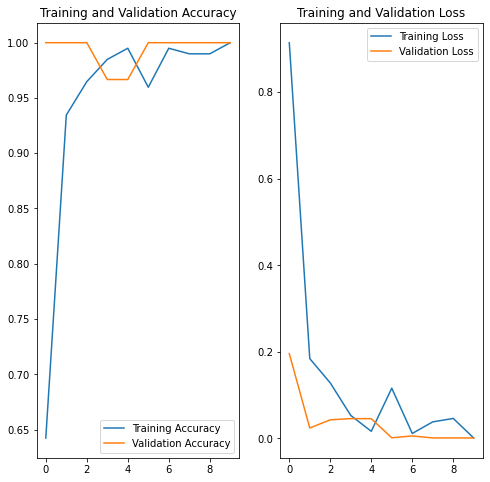

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Technique to reduce overfitting

In [77]:
# Expose the model to more aspects by using (RandomFlip, RandomRotation, RandomZoom)
data_augmentation = models.Sequential([layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)), 
                                       layers.RandomRotation(0.1),
                                       layers.RandomZoom(0.1),])

In [78]:
# Dropout
model = models.Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile and train the model (Again!)

In [79]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [80]:
# Reduce epochs value to 15
epochs = 15

history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/15
397/397 [==============================] - 4s 8ms/step - loss: 1.5274 - accuracy: 0.3778 - val_loss: 0.4550 - val_accuracy: 0.9000
Epoch 2/15
397/397 [==============================] - 3s 7ms/step - loss: 0.7379 - accuracy: 0.7355 - val_loss: 0.2199 - val_accuracy: 0.9333
Epoch 3/15
397/397 [==============================] - 3s 7ms/step - loss: 0.3640 - accuracy: 0.8640 - val_loss: 0.1471 - val_accuracy: 0.9333
Epoch 4/15
397/397 [==============================] - 3s 8ms/step - loss: 0.3448 - accuracy: 0.8892 - val_loss: 0.0925 - val_accuracy: 0.9333
Epoch 5/15
397/397 [==============================] - 3s 7ms/step - loss: 0.3928 - accuracy: 0.8741 - val_loss: 0.0991 - val_accuracy: 0.9667
Epoch 6/15
397/397 [==============================] - 3s 7ms/step - loss: 0.2353 - accuracy: 0.9194 - val_loss: 0.0547 - val_accuracy: 1.0000
Epoch 7/15
397/397 [==============================] - 3s 7ms/step - loss: 0.1602 - accuracy: 0.9622 - val_loss: 0.0304 - val_accuracy: 1.0000
Epoch 

In [81]:
from keras.models import load_model

model.save('image-model.h5') 
#pickle.dump(history, open('image-model.pkl','wb'))
#import joblib
#joblib.dump(history, 'hog_sgd_model.pkl');
#import dill
#import weakref
#dill.loads(dill.dumps(weakref.WeakKeyDictionary()))

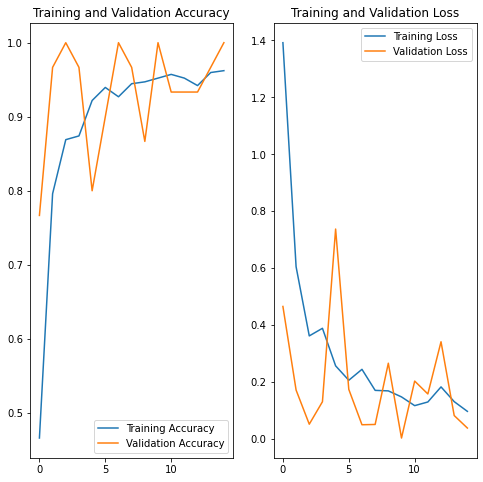

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### I think it's better :)

### Predict
Let's try prediction on one of images in test folder

This prediction category is ==> bag
The score is ==> 99.99358654022217 %


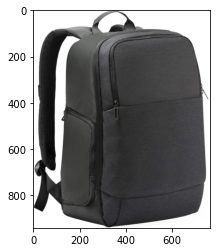

In [21]:
# Create image URL variable 
image_url =  "dataset/testing/bag/1.jpg"

img = tf.keras.utils.load_img(image_url, target_size=(img_height, img_width)) # Load image and resize it with (60*80)
img_array = tf.keras.utils.img_to_array(img) # Convert to array
img_array = tf.expand_dims(img_array, 0) # Create a batch

# Start predict
predictions = model.predict(img_array)

# Get the score of prediction
score = tf.nn.softmax(predictions[0])

# Display the image
plt.imshow(image.load_img(image_url))

# Show the prediction result with score
print(f"This prediction category is ==> {class_names[np.argmax(score)]}")
print(f"The score is ==> {100 * np.max(score)} %")

## Nice job until now!

### Export the model by using Keras for deployment step

In [ ]:
model.save('image-model.h5')